<a href="https://colab.research.google.com/github/swaroopkasaraneni/AI/blob/main/ECPCase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write a program to enter a string from user and perform following tasks
  1. Write a python functionnamed “Tokenize”which returnsthe tokenized string
  2. Print tokens along with the frequency of each tokenusing the above function
  3. Printthe 5 least occurring tokens


In [1]:
from collections import Counter

def tokenize(input_string):
    """
    Tokenize the input string into words and return a list of tokens.
    """
    tokens = input_string.split()
    return tokens


user_string = input("Enter a string: ")
tokens = tokenize(user_string)
token_frequency = Counter(tokens)

# Print tokens along with their frequency
print("\nTokens and their frequencies:")
for token, freq in token_frequency.items():
    print(f"{token}: {freq}")

# Get the 5 least occurring tokens
least_frequent_tokens = token_frequency.most_common()[:-6:-1]
print("\n5 least occurring tokens:")
for token, freq in least_frequent_tokens:
    print(f"{token}: {freq}")


Enter a string: Write a program to enter a string from user

Tokens and their frequencies:
Write: 1
a: 2
program: 1
to: 1
enter: 1
string: 1
from: 1
user: 1

5 least occurring tokens:
user: 1
from: 1
string: 1
enter: 1
to: 1


2. Write a program to enter a string from user and perform following tasks.
  1. Write a python functionnamed “RemoveStopWords”which returns the string after removing stop words
  2. Count frequency ofeach stop word present in a string using the above function
  3. Plot a bar graph depicting stop wordsand their frequencies

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter a string: Write a program to enter a string from user and perform following tasks

String after removing stop words:
Write program enter string user perform following tasks

Stop words and their frequencies:
a: 2
to: 1
from: 1
and: 1


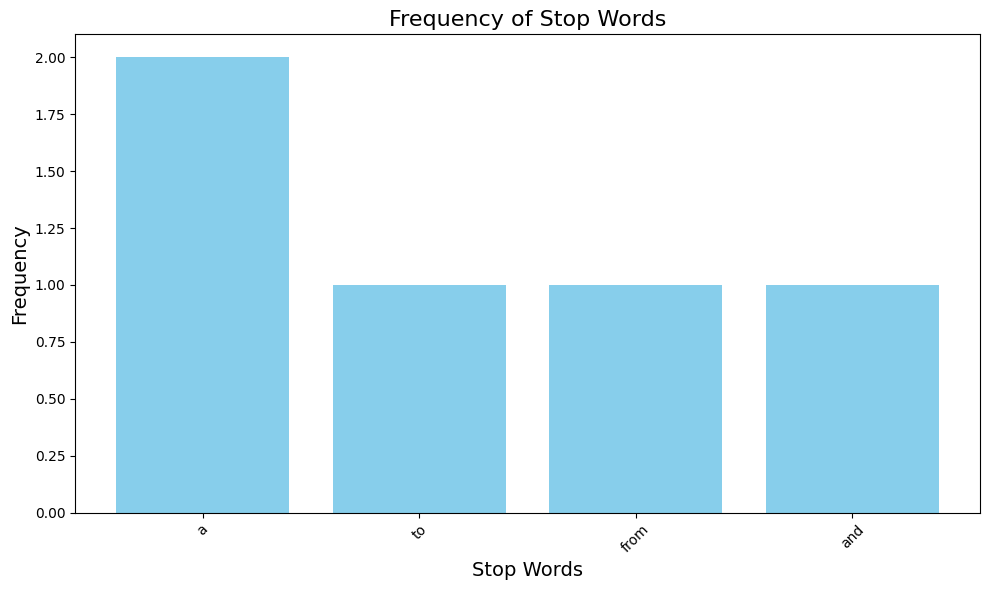

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk

# List of stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    """
    Remove stop words from the input string and return the modified string.
    Also, count the frequency of stop words in the string.
    """

    stop_word_counts = Counter(word for word in tokens if word.lower() in stop_words)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens, stop_word_counts

user_string = input("Enter a string: ")
filtered_tokens, stop_word_freq = remove_stop_words(user_string.split())
print("\nString after removing stop words:")
print(' '.join(filtered_tokens))

# Print the stop words and their frequencies
print("\nStop words and their frequencies:")
for word, freq in stop_word_freq.items():
    print(f"{word}: {freq}")

# Plot the bar graph for stop word frequencies
if stop_word_freq:
    plt.figure(figsize=(10, 6))
    plt.bar(stop_word_freq.keys(), stop_word_freq.values(), color='skyblue')
    plt.title("Frequency of Stop Words", fontsize=16)
    plt.xlabel("Stop Words", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("StopWordsFrequency.png")
    plt.show()
else:
    print("\nNo stop words found in the input string.")


3. Write a program to enter a string from user and perform following tasks
  1. Write a python functionnamed “Lemmatize”which returns a string after lemmatizing the string.
  2. Write a python functionnamed “Stemmed” which returns a string after stemming the string. (Use any stemmer of your preference)
  3. Print all the words along with their lemmatized and stemmed form using theabove functions
  4. Save these results in a csv file having 3 columns:
  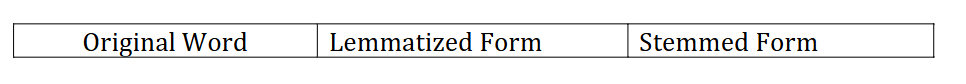



In [10]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Ensure required NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_words(tokens):
    """
    Lemmatize each word in the string and return the lemmatized string.
    """
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized), lemmatized

def stem_words(tokens):
    """
    Stem each word in the string and return the stemmed string.
    """
    stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed), stemmed

user_string = input("Enter a string: ")
tokens = user_string.split()
lemmatized_string, lemmatized_tokens = lemmatize_words(tokens)
stemmed_string, stemmed_tokens = stem_words(tokens)
print("\nOriginal String:")
print(user_string)
print("\nLemmatized String:")
print(lemmatized_string)
print("\nStemmed String:")
print(stemmed_string)

words = user_string.split()
data = {
    'Original Word': words,
    'Lemmatized Word': lemmatized_tokens,
    'Stemmed Word': stemmed_tokens
}
df = pd.DataFrame(data)
csv_file = "lemmatized_stemmed_words.csv"
df.to_csv(csv_file, index=False)
print(f"\nResults saved to '{csv_file}'.")

print("\nWord Comparison Table:")
print(df)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Enter a string: writing a programs to had for ssearching .

Original String:
writing a programs to had for ssearching .

Lemmatized String:
writing a program to had for ssearching .

Stemmed String:
write a program to had for ssearch .

Results saved to 'lemmatized_stemmed_words.csv'.

Word Comparison Table:
  Original Word Lemmatized Word Stemmed Word
0       writing         writing        write
1             a               a            a
2      programs         program      program
3            to              to           to
4           had             had          had
5           for             for          for
6    ssearching      ssearching      ssearch
7             .               .            .


4. Create a python file named “PreProcess” and perform the following tasks.
  1. Copy the function “Tokenize” in this file from question
  2. Copy thefunction “RemoveStopWords” in this file from question
  3. Copy the function “Lemmatize” in this file from question
  4. Create a function named “Refine” which accepts a string and call the above 3 functions in the same order i.e. first Tokenize then RemoveStopWords then Lemmatize.
    Remember:
    1. Inputted string will be input to Tokenize Function
    2. Tokenized String will be input to RemoveStopWords function
    3. StopWordsRemoved string will be input to Lemmatize function
Save this python file as PreProcess and you can use this for upcoming assignments.

In [16]:
# Refine function
def Refine(input_string):
    """
    Refines the input string by tokenizing, removing stop words, and lemmatizing it.
    """
    print(f"Input String: {input_string}")
    # Step 1: Tokenize
    tokenized = tokenize(input_string)
    print(f"Tokenized: {tokenized}")

    # Step 2: Remove Stop Words
    removed_stopwords, no_stopwords = remove_stop_words(tokenized)
    print(f"After Stop Words Removal: {removed_stopwords}")

    # Step 3: Lemmatize
    refined_string,lemmatized = lemmatize_words(removed_stopwords)
    print(f"Lemmatized: {lemmatized}")

    return refined_string

# Example usage
if __name__ == "__main__":
    input_text = input("Enter a string: ")
    refined_result = Refine(input_text)
    print(f"\nRefined String: {refined_result}")



Enter a string: writing a programs to had for corpora ssearching .
Input String: writing a programs to had for corpora ssearching .
Tokenized: ['writing', 'a', 'programs', 'to', 'had', 'for', 'corpora', 'ssearching', '.']
After Stop Words Removal: ['writing', 'programs', 'corpora', 'ssearching', '.']
Lemmatized: ['writing', 'program', 'corpus', 'ssearching', '.']

Refined String: writing program corpus ssearching .
